In [25]:
import pyodbc as od
import pandas as pd
import numpy as np

In [21]:
sql_conn = od.connect('DRIVER={SQL Server};\
                            SERVER=sql1944-fm1-in.amr.corp.intel.com,3181;\
                            DATABASE=GSMDW_TST;\
                            Trusted_Connection=yes;\
                            integrated security=true')

query= "SELECT * FROM [JUSTIN].[KPI_OTD]"
df = pd.read_sql(query, sql_conn)
sql_conn.close()

In [75]:
df.head()

,PONbr,POLineNbr,Org,GoodsLastReceipt,RDD,TotalChange,BuyerName,Plant,PaymentTerm,OTD,SupplierID,SDD,MtrlID,POCreate,SupplierName,POLate,RDDDelta,SDDDelta,Delta
0,7001304000,00040,GFM,2017-12-15,2099-12-31,2,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000500166139,2017-11-28,EDWARDS VACUUM LLC,No,29966 days,-17 days,-17 days
1,7001304000,00050,GFM,2017-12-15,2099-12-31,0,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000500229183,2017-11-28,EDWARDS VACUUM LLC,No,29966 days,-17 days,-17 days
2,7001304000,00060,GFM,2018-01-29,2099-12-31,0,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000500279227,2017-11-28,EDWARDS VACUUM LLC,No,29921 days,-62 days,-62 days
3,7001304000,00070,GFM,2017-12-07,2099-12-31,0,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000500229187,2017-11-28,EDWARDS VACUUM LLC,No,29974 days,-9 days,-9 days
4,7001304000,00080,GFM,2017-12-07,2099-12-31,0,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000233151417,2017-11-28,EDWARDS VACUUM LLC,No,29974 days,-9 days,-9 days


In [26]:
df['POLate'] = np.where(df.POCreate >= df.RDD , 'Yes', 'No')

In [74]:
df['OTD']=np.where(df['OTD']!= '1' , '0', '1')

In [76]:
df['OTD']=pd.to_numeric(df['OTD'])

In [60]:
len(df)

739816

In [58]:
#to drop rows that is missing vaues for a specified column
df=df.dropna(subset=['GoodsLastReceipt'])

In [65]:
df=df[df['GoodsLastReceipt']!='12/31/9999']

In [67]:
df['GoodsLastReceipt']=pd.to_datetime(df['GoodsLastReceipt'], infer_datetime_format=True)

In [52]:
df['RDD']=pd.to_datetime(df['RDD'], infer_datetime_format=True)

In [55]:
df['SDD']=pd.to_datetime(df['SDD'], infer_datetime_format=True)

In [56]:
df['POCreate']=pd.to_datetime(df['POCreate'], infer_datetime_format=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739815 entries, 0 to 739815
Data columns (total 19 columns):
PONbr               739815 non-null object
POLineNbr           739815 non-null object
Org                 739811 non-null object
GoodsLastReceipt    739815 non-null datetime64[ns]
RDD                 739815 non-null datetime64[ns]
TotalChange         739815 non-null object
BuyerName           739765 non-null object
Plant               739815 non-null object
PaymentTerm         739815 non-null object
OTD                 739815 non-null int64
SupplierID          739815 non-null object
SDD                 739815 non-null datetime64[ns]
MtrlID              739815 non-null object
POCreate            739815 non-null datetime64[ns]
SupplierName        739815 non-null object
POLate              739815 non-null object
RDDDelta            739815 non-null timedelta64[ns]
SDDDelta            739815 non-null timedelta64[ns]
Delta               739815 non-null timedelta64[ns]
dtypes: dateti

In [69]:
df['RDDDelta'] = df['RDD']-df['GoodsLastReceipt']

In [71]:
df['SDDDelta'] = df['SDD']-df['GoodsLastReceipt']

In [72]:
df['Delta'] =  np.where(df.RDD == '12/31/2099' , df.SDDDelta, df.RDDDelta)

In [80]:
import matplotlib.pyplot as mplt
import seaborn as sb
%matplotlib inline
mplt.rcParams['figure.figsize'] = 8,4
import warnings
warnings.filterwarnings('ignore')

In [85]:
df.head()

,PONbr,POLineNbr,Org,GoodsLastReceipt,RDD,TotalChange,BuyerName,Plant,PaymentTerm,OTD,SupplierID,SDD,MtrlID,POCreate,SupplierName,POLate,RDDDelta,SDDDelta,Delta
0,7001304000,00040,GFM,2017-12-15,2099-12-31,2,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000500166139,2017-11-28,EDWARDS VACUUM LLC,No,29966 days,-17 days,-17 days
1,7001304000,00050,GFM,2017-12-15,2099-12-31,0,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000500229183,2017-11-28,EDWARDS VACUUM LLC,No,29966 days,-17 days,-17 days
2,7001304000,00060,GFM,2018-01-29,2099-12-31,0,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000500279227,2017-11-28,EDWARDS VACUUM LLC,No,29921 days,-62 days,-62 days
3,7001304000,00070,GFM,2017-12-07,2099-12-31,0,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000500229187,2017-11-28,EDWARDS VACUUM LLC,No,29974 days,-9 days,-9 days
4,7001304000,00080,GFM,2017-12-07,2099-12-31,0,"Zhu, Tammy",DL,DT,0,1000016370,2017-11-28,000000000233151417,2017-11-28,EDWARDS VACUUM LLC,No,29974 days,-9 days,-9 days


In [105]:
df1=df[(df['Org']=='FAB')&(df['Plant']=='OC')]##&(df['SupplierName']=='TOKYO ELECTRON AMERICA INC')]

In [106]:
len(df1)

12338

In [110]:
df1['POType']=df1['PONbr'].str[:2]

In [111]:
df1.head()

,PONbr,POLineNbr,Org,GoodsLastReceipt,RDD,TotalChange,BuyerName,Plant,PaymentTerm,OTD,SupplierID,SDD,MtrlID,POCreate,SupplierName,POLate,RDDDelta,SDDDelta,Delta,POType
1268,4200161934,00400,FAB,2018-06-18,2018-11-07,1,"Thurman, Kevin",OC,JE1,1,1000005761,2018-11-07,000000000500299057,2018-05-30,SCREEN SPE USA LLC,Yes,142 days,142 days,142 days,42
1269,4200161935,00010,FAB,2018-06-22,2018-07-03,1,"Thurman, Kevin",OC,JE1,1,1000005761,2018-07-03,000000000500359692,2018-05-30,SCREEN SPE USA LLC,No,11 days,11 days,11 days,42
1270,4200161935,00020,FAB,2018-07-12,2018-07-03,1,"Thurman, Kevin",OC,JE1,0,1000005761,2018-07-03,000000000500359691,2018-05-30,SCREEN SPE USA LLC,No,-9 days,-9 days,-9 days,42
1271,4200161935,00030,FAB,2018-07-23,2018-12-14,3,"Thurman, Kevin",OC,JE1,1,1000005761,2018-07-03,000000000500359690,2018-05-30,SCREEN SPE USA LLC,Yes,144 days,-20 days,144 days,42
1272,4200161935,00040,FAB,2018-10-16,2018-12-14,3,"Thurman, Kevin",OC,JE1,1,1000005761,2018-07-03,000000000500359689,2018-05-30,SCREEN SPE USA LLC,Yes,59 days,-105 days,59 days,42


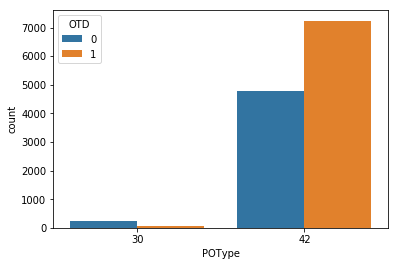

In [112]:
g = sb.countplot(x="POType", hue="OTD", data=df1)